# Importing modules  

In [ ]:
%matplotlib inline
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns 
import json 
from pandas.io.json import json_normalize
from wordcloud import WordCloud,STOPWORDS
import datetime

In [ ]:
month_order = [ "Jan", "Feb" , "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Scrap data preprocessiong

In [ ]:
TedTalks = pd.read_csv('TED_Talk.csv')
TedTalks.columns

Index(['talk__id', 'talk__name', 'talk__description', 'view_count',
       'comment_count', 'duration', 'transcript', 'video_type_name', 'event',
       'number_of__speakers', 'speaker__id', 'speaker__name',
       'speaker__description', 'speaker__who_he_is', 'speaker__why_listen',
       'speaker__what_others_say', 'speaker__is_published',
       'all_speakers_details', 'is_talk_featured', 'has_talk_citation',
       'recording_date', 'published_timestamp', 'talks__tags',
       'number_of__tags', 'language', 'native_language', 'language_swap',
       'is_subtitle_required', 'url__webpage', 'url__audio', 'url__video',
       'url__photo__talk', 'url__photo__speaker', 'url__subtitled_videos',
       'number_of__subtitled_videos', 'talk__download_languages',
       'number_of__talk__download_languages', 'talk__more_resources',
       'number_of__talk__more_resources', 'talk__recommendations__blurb',
       'talk__recommendations', 'number_of__talk__recommendations',
       'related_tal

In [ ]:
df1= TedTalks[["talk__name","talk__description","speaker__name","speaker__who_he_is"]]

In [ ]:
len(TedTalks)

4609

In [ ]:
TedTalks.shape

(4609, 52)

In [ ]:
TedTalks.dtypes

talk__id                                               int64
talk__name                                            object
talk__description                                     object
view_count                                             int64
comment_count                                        float64
duration                                               int64
transcript                                            object
video_type_name                                       object
event                                                 object
number_of__speakers                                    int64
speaker__id                                          float64
speaker__name                                         object
speaker__description                                  object
speaker__who_he_is                                    object
speaker__why_listen                                   object
speaker__what_others_say                              object
speaker__is_published   

In [ ]:
TedIntColumns=TedTalks.select_dtypes(include=['int64'])
TedIntColumns.head()

talk__id  ...  number_of__talks__take_actions
0        66  ...                               0
1      2405  ...                               0
2      1569  ...                               0
3       848  ...                               0
4      1042  ...                               0

[5 rows x 11 columns]

In [ ]:
TedIntColumns.corr()

talk__id  ...  number_of__talks__take_actions
talk__id                             1.000000  ...                        0.151036
view_count                          -0.138142  ...                        0.005362
duration                            -0.156954  ...                        0.036644
number_of__speakers                  0.115142  ...                        0.032765
number_of__tags                      0.024162  ...                        0.182997
number_of__subtitled_videos         -0.596703  ...                        0.067343
number_of__talk__download_languages -0.505911  ...                       -0.026240
number_of__talk__more_resources     -0.127973  ...                        0.090401
number_of__talk__recommendations     0.042937  ...                        0.345498
number_of__related_talks            -0.087717  ...                        0.098703
number_of__talks__take_actions       0.151036  ...                        1.000000

[11 rows x 11 columns]

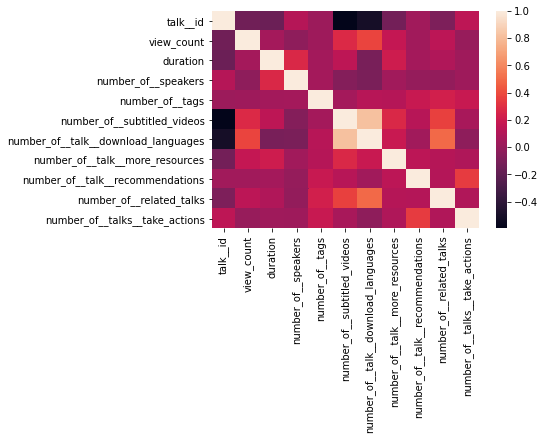

In [ ]:
sns.heatmap(TedIntColumns.corr()) //quite symmetric

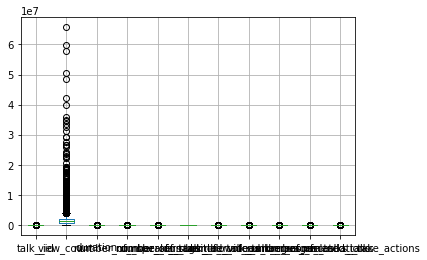

In [ ]:
TedIntColumns.boxplot()

In [ ]:
TedIntColumns.describe()

talk__id  ...  number_of__talks__take_actions
count   4609.000000  ...                     4609.000000
mean   14512.962465  ...                        0.272510
std    18810.782943  ...                        0.640049
min        1.000000  ...                        0.000000
25%     1367.000000  ...                        0.000000
50%     2604.000000  ...                        0.000000
75%    24140.000000  ...                        0.000000
max    64598.000000  ...                        4.000000

[8 rows x 11 columns]



```
`# This is formatted as code`
```

# Basic analysis 

In [ ]:
#15 most viewed 
df = pd.read_csv('ted_main.csv')
print(df.columns)
df["film_date"]=df["film_date"].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df["published_date"]=df["published_date"].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

pop_talks=df[["name","title","main_speaker","views","film_date"]].sort_values("views",ascending=False)[:15]
pop_talks

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


name  ...   film_date
0             Ken Robinson: Do schools kill creativity?  ...  25-02-2006
1346  Amy Cuddy: Your body language may shape who yo...  ...  26-06-2012
677       Simon Sinek: How great leaders inspire action  ...  17-09-2009
837             Brené Brown: The power of vulnerability  ...  06-06-2010
452   Mary Roach: 10 things you didn't know about or...  ...  06-02-2009
1776  Julian Treasure: How to speak so that people w...  ...  10-06-2013
201             Jill Bolte Taylor: My stroke of insight  ...  27-02-2008
5                    Tony Robbins: Why we do what we do  ...  02-02-2006
2114  James Veitch: This is what happens when you re...  ...  08-12-2015
1416  Cameron Russell: Looks aren't everything. Beli...  ...  27-10-2012
500                  Dan Pink: The puzzle of motivation  ...  24-07-2009
1163                Susan Cain: The power of introverts  ...  28-02-2012
1036                   Pamela Meyer: How to spot a liar  ...  13-07-2011
2109  Robert Waldinger: What makes a good life? Less...  ...  14-11-2015
1129       Shawn Achor: The happy secret to better work  ...  11-05-2011

[15 rows x 5 columns]

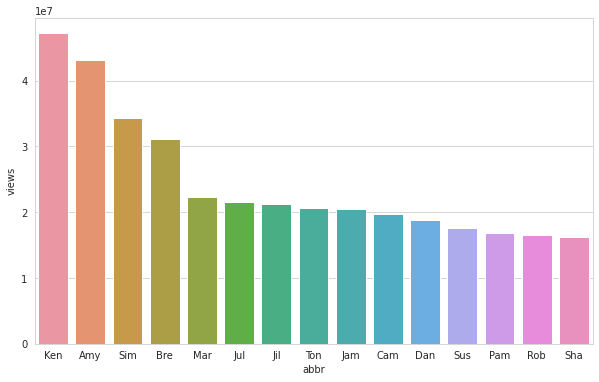

In [ ]:
#most viewed based on speaker 
pop_talks['abbr']= pop_talks["main_speaker"].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x="abbr",y="views",data=pop_talks)

In [ ]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [ ]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

In [ ]:
df.describe


<bound method NDFrame.describe of       comments  ...     views
0         4553  ...  47227110
1          265  ...   3200520
2          124  ...   1636292
3          200  ...   1697550
4          593  ...  12005869
...        ...  ...       ...
2545        17  ...    450430
2546         6  ...    417470
2547        10  ...    375647
2548        32  ...    419309
2549         8  ...    391721

[2550 rows x 17 columns]>

In [ ]:
df[['views','comments']].corr()

views  comments
views     1.000000  0.530939
comments  0.530939  1.000000

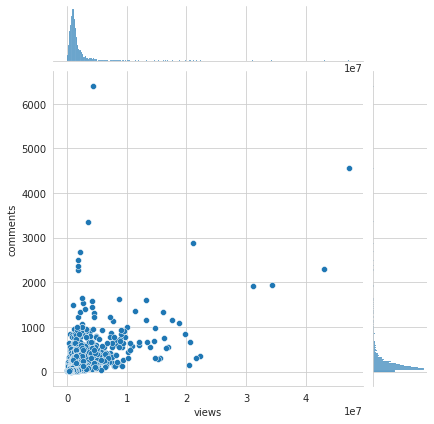

In [ ]:
sns.jointplot(x='views', y='comments',data=df)

views  comments  duration
views     1.000000  0.530939  0.048740
comments  0.530939  1.000000  0.140694
duration  0.048740  0.140694  1.000000

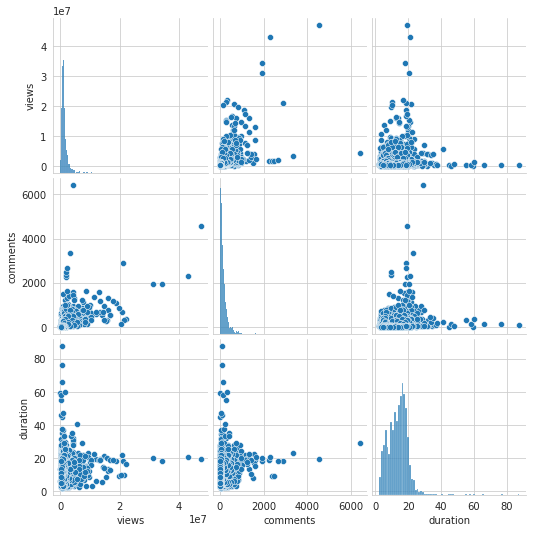

In [ ]:
df["duration"]=df["duration"]/60 #minutes
sns.pairplot(data=df, vars=["views", "comments", "duration"])
display(df[["views", "comments", "duration"]].corr())

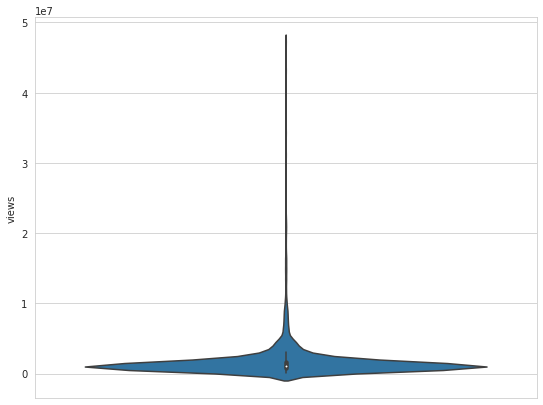

In [ ]:

fig, ax = plt.subplots(figsize =(9, 7))


sns.violinplot( ax = ax, y = df["views"] )

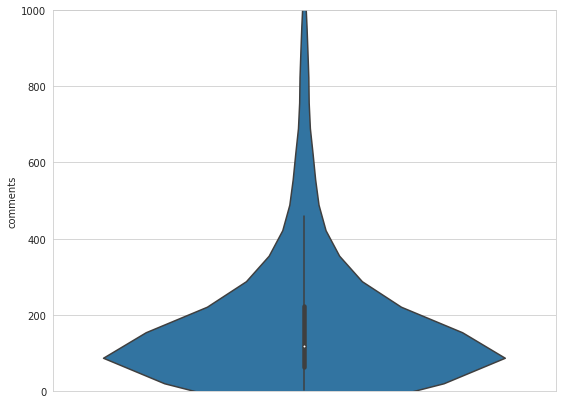

In [ ]:

fig, ax = plt.subplots(figsize =(9, 7))

ax.set_ylim([0,1000])
sns.violinplot( ax = ax, y = df["comments"] )

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['main_speaker'], y = df['views'], mode='lines+markers',name='views'))
fig.update_layout(title_text='Trend of views in film_date',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
df['dis_quo']=df['comments']/df['views']
df[['title','main_speaker','views','comments','dis_quo','film_date']].sort_values('dis_quo',ascending=False).head(10)

title  ...   film_date
744        The case for same-sex marriage  ...  02-12-2009
803                E-voting without fraud  ...  14-07-2010
96                       Militant atheism  ...  02-02-2002
694   Inside a school for suicide bombers  ...  10-02-2010
954          Taking imagination seriously  ...  03-03-2011
840                  On reading the Koran  ...  10-10-2010
876          Curating humanity's heritage  ...  08-12-2010
1787    How do you explain consciousness?  ...  18-03-2014
661          The danger of science denial  ...  11-02-2010
561             Dance to change the world  ...  04-11-2009

[10 rows x 6 columns]

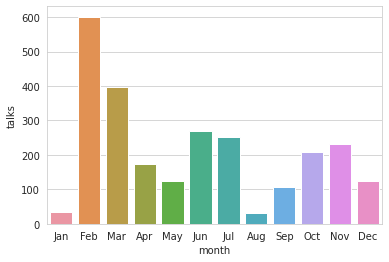

In [ ]:
df['month']=df['film_date'].apply(lambda x:month_order[int(x.split('-')[1])-1])
month_df=pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns=["month","talks"]
sns.barplot(x="month",y="talks",data=month_df,order=month_order)

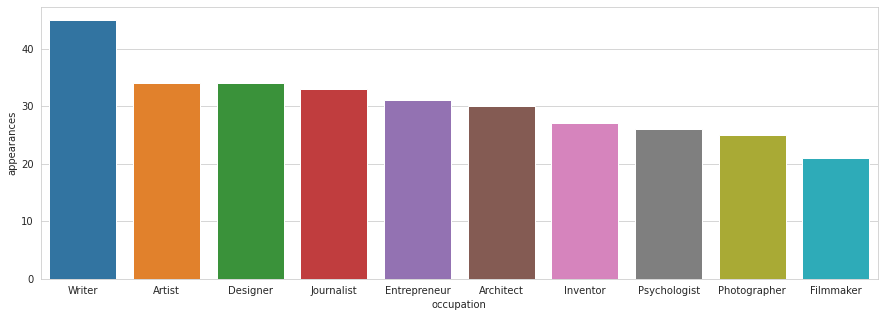

In [ ]:

occupation_df=df.groupby('speaker_occupation').count().reset_index()[["speaker_occupation",'comments']]
occupation_df.columns=["occupation","appearances"]
occupation_df=occupation_df.sort_values("appearances",ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x="occupation",y="appearances",data=occupation_df.head(10))
plt.show()

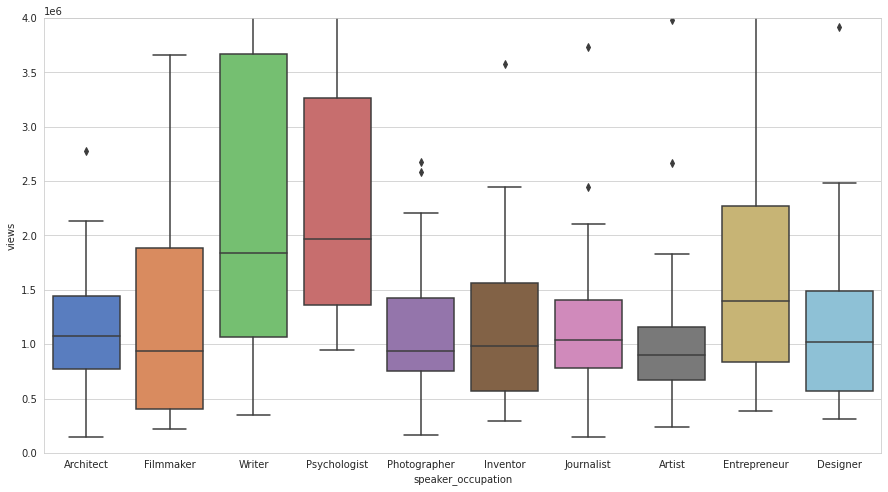

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.boxplot(x="speaker_occupation",y="views",data=df[df['speaker_occupation'].isin(occupation_df.head(10)["occupation"])],palette="muted",ax=ax)
ax.set_ylim([0,0.4e7])
plt.show()


In [ ]:
df['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [ ]:
import ast
s=df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1,drop=True)
s.name='theme'
s

In [ ]:
theme_df=df.drop('tags',axis=1).join(s)
pop_themes=pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns=['theme','talks']
pop_themes['theme'].head(10)

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme',y='talks',data=pop_themes.head(10))
plt.show()

In [ ]:
df['related_talks']

0       [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...
1       [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...
2       [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...
3       [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...
4       [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...
                              ...                        
2545    [{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...
2546    [{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...
2547    [{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...
2548    [{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...
2549    [{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...
Name: related_talks, Length: 2550, dtype: object

In [ ]:
df['related_talks']=df['related_talks'].apply(lambda x: ast.literal_eval(x))
s=df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1,drop=True)
s.name='related'
related_df=df.drop('related_talks',axis=1).join(s)
related_df['related']=related_df['related'].apply(lambda x:x['title'])
edges=list(zip(related_df['title'],related_df['related']))

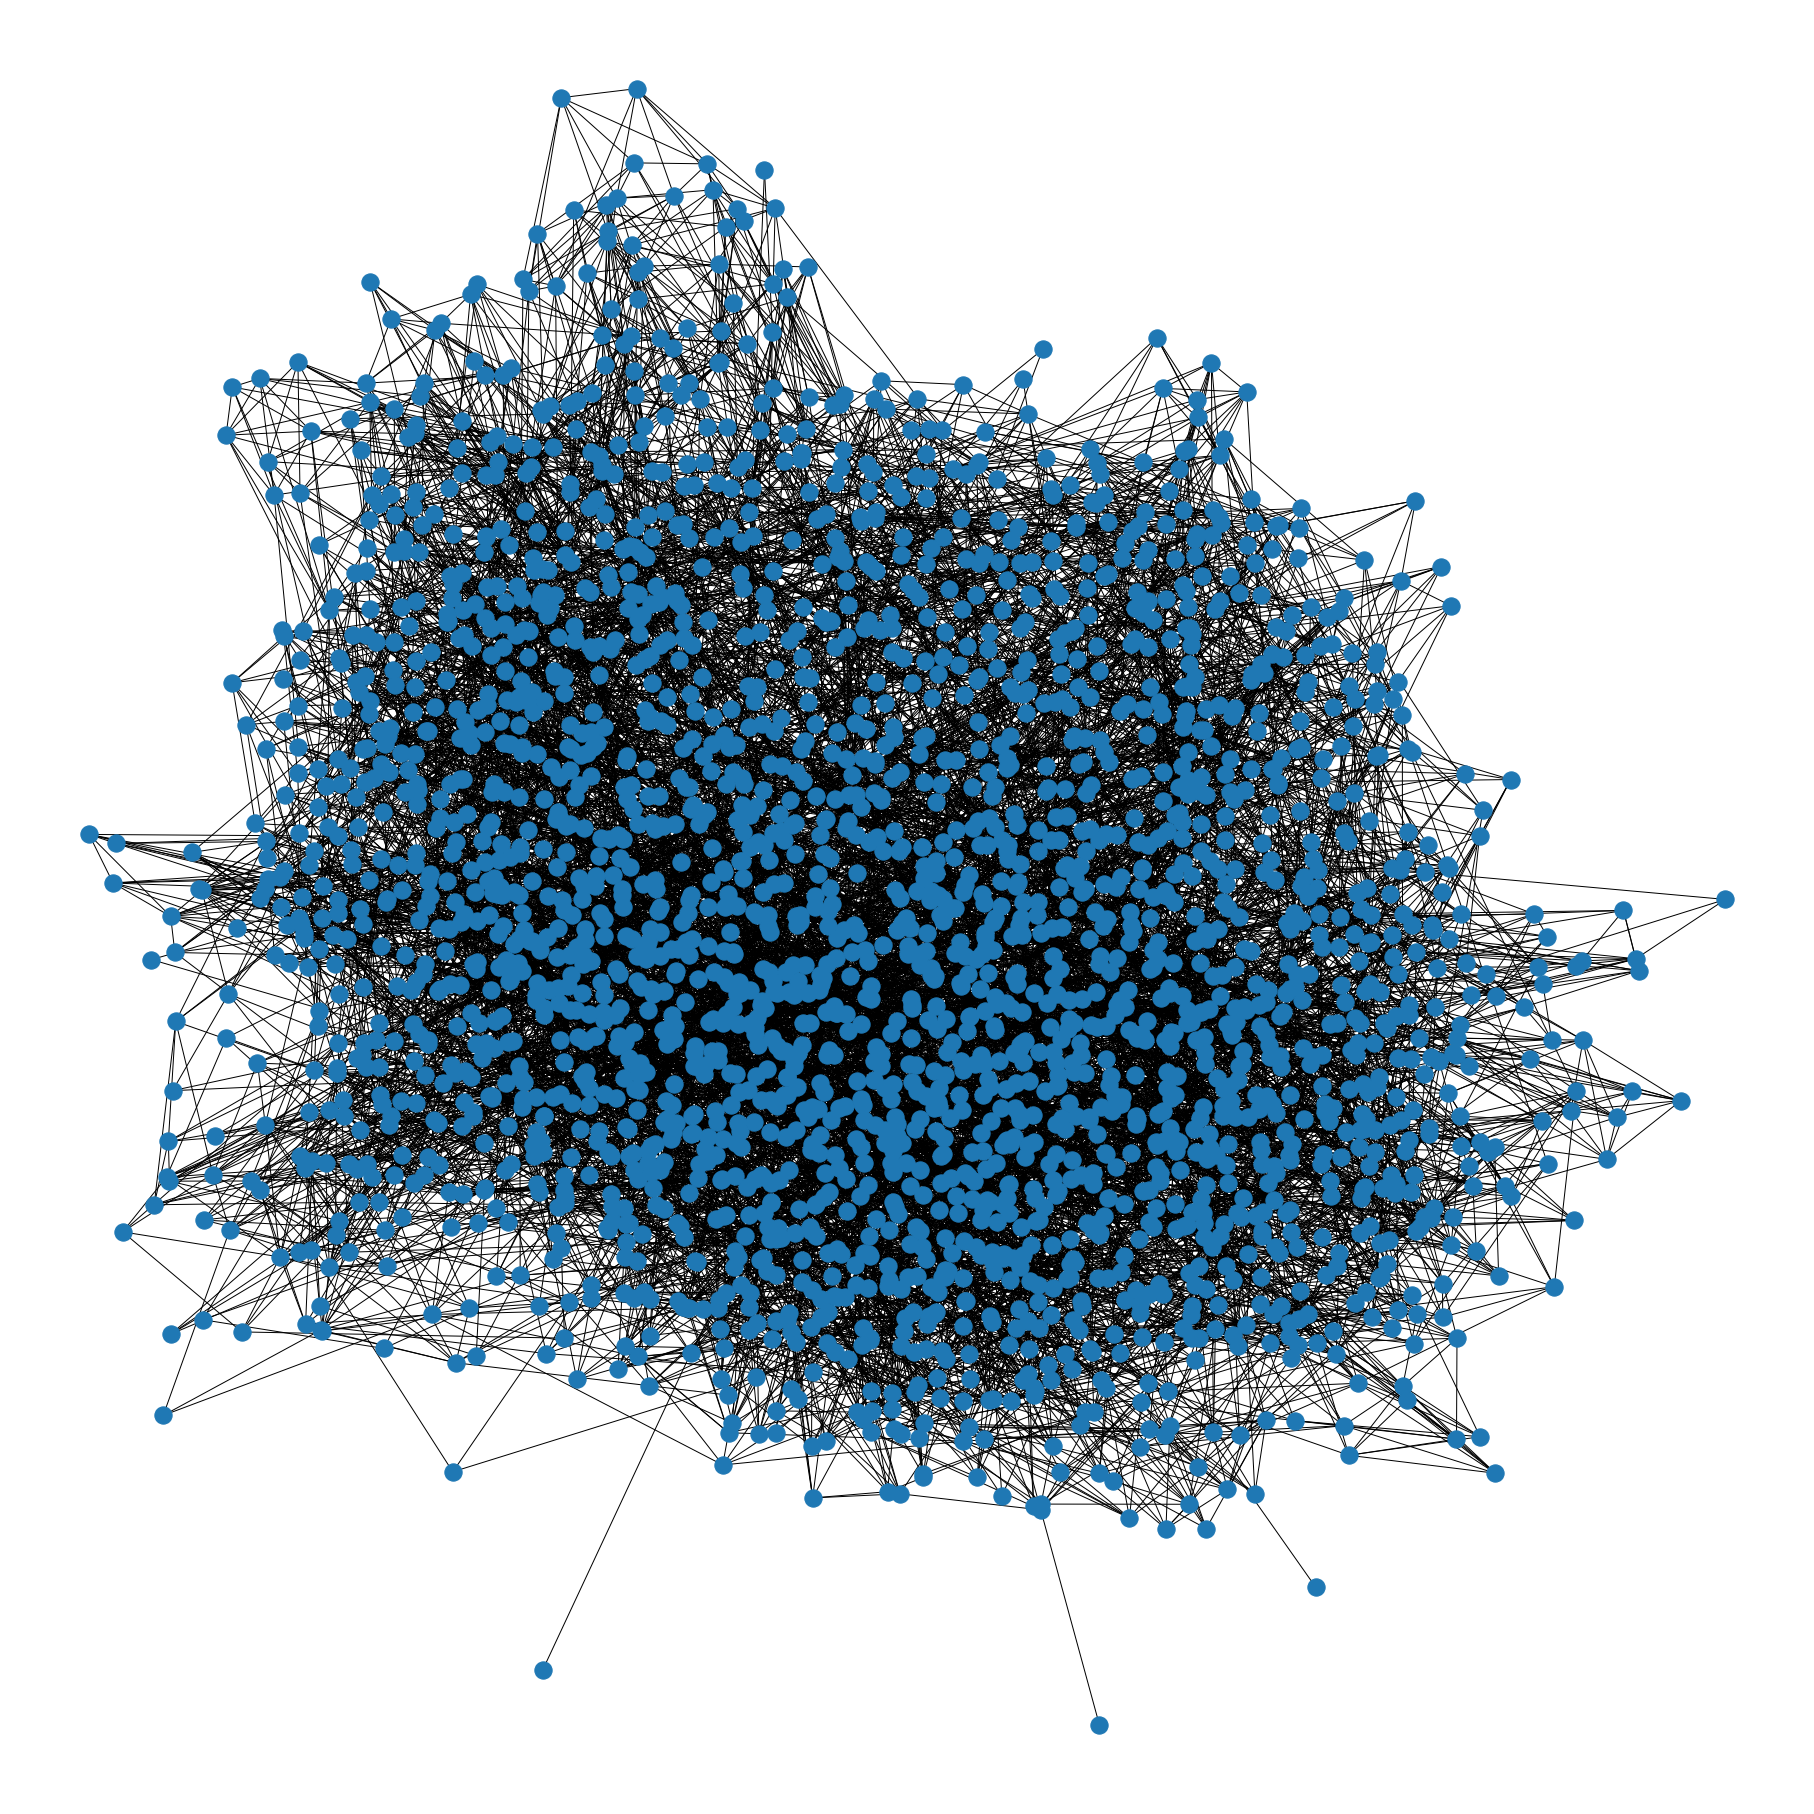

In [ ]:
import networkx as nx
g=nx.Graph()
g.add_edges_from(edges)
plt.figure(figsize=(25,25))
nx.draw(g)


# text speaker analysis
//the types of words like I, so, am, story, confession, audience attract, more views, more recommend. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from string import punctuation
import re
from collections import Counter

ts = pd.read_csv("/content/transcripts.csv")
ts.head(10)

def removeMusicAndApplause(transcript):
    r = re.compile(r"(\(Music.*?\))|(\(Applause.*?\))|(\(Video.*?\))|(\(Sing.*?\))|(\(Cheer.*?\))", re.IGNORECASE)
    return r.sub("", transcript).strip()

ts['raw_transcript'] = ts['transcript']
ts['transcript'] = ts['transcript'].apply(removeMusicAndApplause)

ts.head()

transcript  ...                                     raw_transcript
0  Good morning. How are you?(Laughter)It's been ...  ...  Good morning. How are you?(Laughter)It's been ...
1  Thank you so much, Chris. And it's truly a gre...  ...  Thank you so much, Chris. And it's truly a gre...
2  Hello voice mail, my old friend.(Laughter)I've...  ...  (Music: "The Sound of Silence," Simon & Garfun...
3  If you're here today — and I'm very happy that...  ...  If you're here today — and I'm very happy that...
4  About 10 years ago, I took on the task to teac...  ...  About 10 years ago, I took on the task to teac...

[5 rows x 3 columns]

In [ ]:
def removeMusicAndApplause(transcript):
    r = re.compile(r"(\(Music.*?\))|(\(Applause.*?\))|(\(Video.*?\))|(\(Sing.*?\))|(\(Cheer.*?\))", re.IGNORECASE)
    return r.sub("", transcript).strip()

ts['raw_transcript'] = ts['transcript']
ts['transcript'] = ts['transcript'].apply(removeMusicAndApplause)

ts.head()

transcript  ...                                     raw_transcript
0  Good morning. How are you?(Laughter)It's been ...  ...  Good morning. How are you?(Laughter)It's been ...
1  Thank you so much, Chris. And it's truly a gre...  ...  Thank you so much, Chris. And it's truly a gre...
2  Hello voice mail, my old friend.(Laughter)I've...  ...  Hello voice mail, my old friend.(Laughter)I've...
3  If you're here today — and I'm very happy that...  ...  If you're here today — and I'm very happy that...
4  About 10 years ago, I took on the task to teac...  ...  About 10 years ago, I took on the task to teac...

[5 rows x 3 columns]

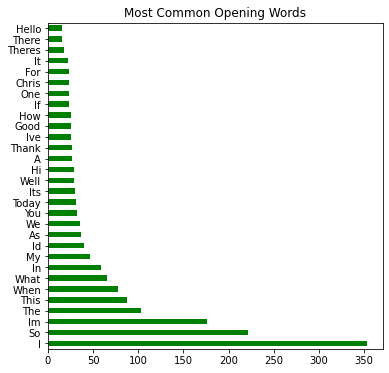

In [ ]:
punctuation_table = str.maketrans({key: None for key in punctuation})
ts['first_word'] = ts['transcript'].map(lambda x: x.split(" ")[0]).map(lambda x: x.translate(punctuation_table))
opening_counts = ts.first_word.value_counts()
opening_counts.head(30).plot(kind='barh', figsize=(6,6), title='Most Common Opening Words', color='g')

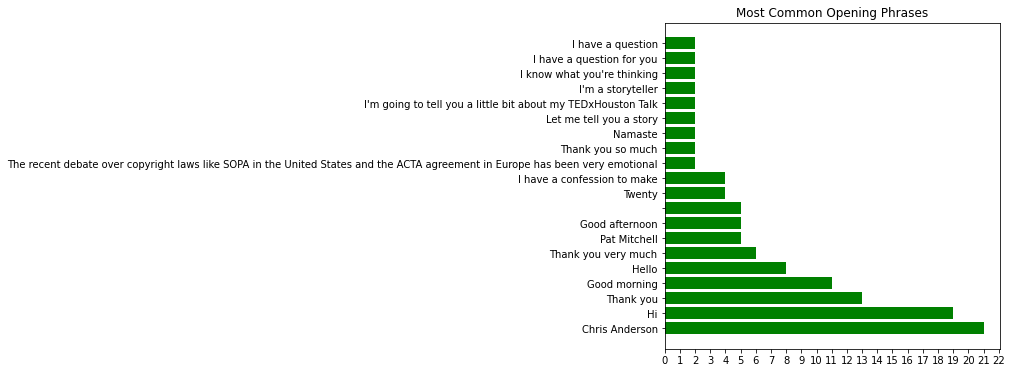

In [ ]:
r = re.compile(r'[.!?:-]'.format(re.escape(punctuation)))
ts['first_250'] = ts['transcript'].map(lambda x: x[0:250])
phrases = []
for x in ts['first_250'].tolist():
    openings = r.split(x)
    phrases.append(openings[0])
    
phrase_count = Counter(phrases)
phrase_count = sorted(phrase_count.items(), key=operator.itemgetter(1))

phrase, count = zip(*phrase_count)
phrase = [x for _,x in sorted(zip(count,phrase), reverse=True)]
count = sorted(count, reverse=True)
y_pos = np.arange(len(phrase))

number_of_phrases = 20

plt.figure(figsize=(6,6))
plt.title('Most Common Opening Phrases')
plt.yticks(y_pos[:number_of_phrases], phrase[:number_of_phrases])
plt.xticks(np.arange(25))
plt.barh(y_pos[:number_of_phrases], count[:number_of_phrases],color='g')
plt.show()


In [ ]:
ts['speaker'] = ts['transcript'].map(lambda x: x.split(":")[0])
mask = ts['speaker'].map(lambda x: x.split(" ")).map(lambda x: len(x)) >= 4
ts.loc[mask, 'speaker'] = 'unknown'

ts[ts['speaker'] != "unknown"]['speaker'].head(10)


26           My title
35              Video
97       Thomas Dolby
100       Sergey Brin
112     Kurt Andersen
124      Allison Hunt
127    Chris Anderson
146                  
147    Chris Anderson
175       Frank Gehry
Name: speaker, dtype: object

In [ ]:
# Sanity check that there we caught the 20 rows with Chris Anderson as the annotated speaker.
by_Chris = ts[ts['speaker'] == "Chris Anderson"]
len(by_Chris)

21

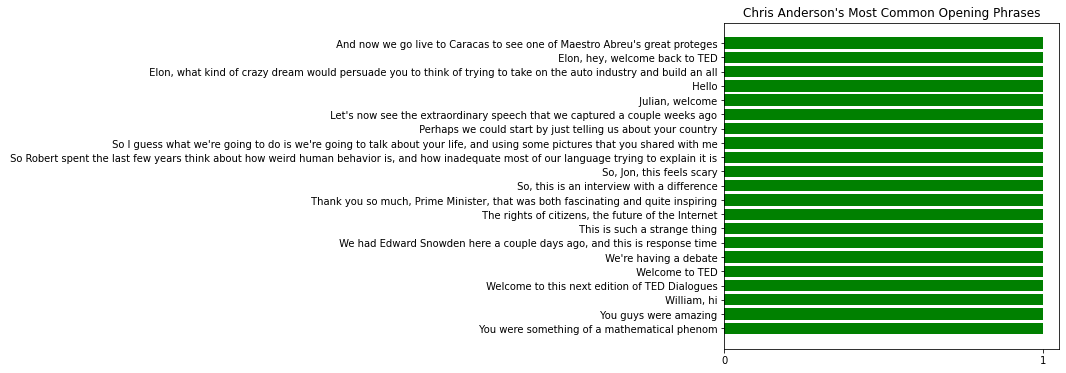

In [ ]:
r = re.compile(r'[.!?:-]'.format(re.escape(punctuation)))
raw_openings = by_Chris['transcript'].apply(lambda x: x[0:250])
phrases = []
for x in raw_openings.tolist():
    openings = r.split(x)
    phrases.append(openings[1]) # Skip the "Chris Anderson:"
    
phrase_count = Counter(phrases)
phrase_count = sorted(phrase_count.items(), key=operator.itemgetter(1))

phrase, count = zip(*phrase_count)
phrase = [x for _,x in sorted(zip(count,phrase), reverse=True)]
count = sorted(count, reverse=True)
y_pos = np.arange(len(phrase))

number_of_phrases = 21

plt.figure(figsize=(6,6))
plt.title('Chris Anderson\'s Most Common Opening Phrases')
plt.yticks(y_pos[:number_of_phrases], phrase[:number_of_phrases])
plt.xticks(np.arange(25))
plt.barh(y_pos[:number_of_phrases], count[:number_of_phrases],color='g')
plt.show()

# topic clustering


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import ast

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from wordcloud import WordCloud
from wordcloud import get_single_color_func

from collections import Counter


SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

cmap_string = 'Spectral'

In [ ]:
print(df.shape)

(2550, 17)


In [ ]:
df.tags = df.tags.apply(ast.literal_eval)
df['tags_single_string'] = df.tags.apply(' '.join)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X = df.tags_single_string.values

print(f'The first talk keywords: [{X[0]}]')

countv = CountVectorizer()
X_counts = countv.fit_transform(X)

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_counts)
print(X_tfidf.shape)
print(countv.get_feature_names()[:10])

The first talk keywords: [children creativity culture dance education parenting teaching]
(2550, 440)
['3d', 'activism', 'addiction', 'adventure', 'advertising', 'africa', 'aging', 'agriculture', 'ai', 'aids']


TypeError: ignored

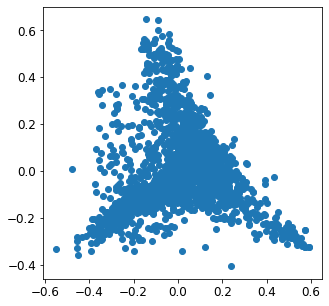

In [ ]:
pca_comps = 2
pca = PCA(n_components=pca_comps)
x_pca = pca.fit_transform(X_tfidf.toarray())

fig, ax = plt.subplots(1,1, figsize=(5,5))
scatter, = ax.scatter(x_pca[:,0], x_pca[:,1])
ax.legend(*scatter.legend_elements())
ax.set_xlabel(f'PC 1 ({100*pca.explained_variance_ratio_[0]: 0.2f}%)')
ax.set_ylabel(f'PC 2 ({100*pca.explained_variance_ratio_[1]: 0.2f}%)')
plt.show()

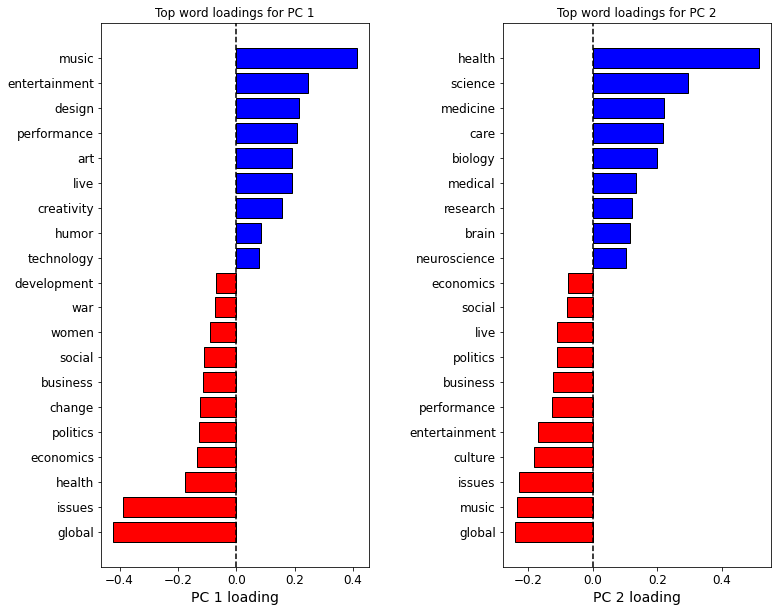

In [ ]:
feature_names = countv.get_feature_names()
words_to_grab = 10

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
for i, comp in enumerate(pca.components_):
    top_words = [feature_names[ind] for ind in comp.argsort()[-1:-words_to_grab:-1]]
    bottom_words = [feature_names[ind] for ind in comp.argsort()[words_to_grab::-1]]
    bp_top = ax[i].barh(top_words, comp[comp.argsort()[-1:-words_to_grab:-1]], 
              color='blue', edgecolor='black')
    bp_bottom = ax[i].barh(bottom_words, comp[comp.argsort()[words_to_grab::-1]], 
              color='red', edgecolor='black')
    ax[i].axvline(0, linestyle='--', color='black')
    ax[i].set_title(f'Top word loadings for PC {i+1}')
    ax[i].set_xlabel(f'PC {i+1} loading')
    ax[i].invert_yaxis()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
def assign_word_to_cluster(string_list, labels, vocab):
    '''generate a counter to get word counts per cluster, 
    then assign each word to the cluster it's most often associated with'''
    
    texts = [' '.join(string_list.loc[labels==c].values).split(' ') 
             for c in list(set(labels))]

    counters = [Counter(text) for text in texts]

    word_cluster = {}
    for word in vocab:
        cluster_count = []
        for i, c in enumerate(counters):
            cluster_count.append(c[word]/len(np.where(labels == i)))
            word_cluster[word] = np.argmax(cluster_count)

        cluster_lookup = {k: [] for k in range(1+np.max(labels))}
        for k, v in word_cluster.items():
            cluster_lookup[v].append(k)
    return word_cluster, cluster_lookup

def assign_word_to_color(cluster_lookup, cmap):
    ''' map each cluster's associated word to a color;
    return a dictionary of {hex color}: {word_list} for passing to word cloud API'''
    color_dict = {}
    for i, cluster in enumerate(list(cluster_lookup.keys())):
        color_dict[colors.to_hex(cmap(i))] = cluster_lookup[cluster]
    return color_dict

def plot_pc_space(x_pca, pca, labels, pca_comps, cmap):
    ''' plot observations in PC 1-2 space, colored by kmeans label'''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    scatter = ax.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap = cmap)
    #ax.legend(*scatter.legend_elements(), title='Clusters')
    ax.set_xlabel(f'PC 1 ({100*pca.explained_variance_ratio_[0]: 0.2f}%)')
    ax.set_ylabel(f'PC 2 ({100*pca.explained_variance_ratio_[1]: 0.2f}%)')
    ax.set_title(f'{pca_comps} PCs')
    plt.show()
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

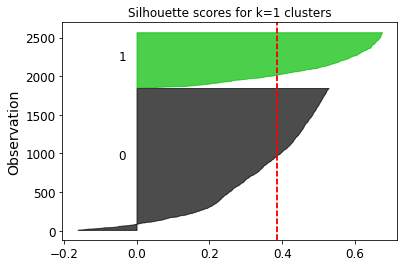

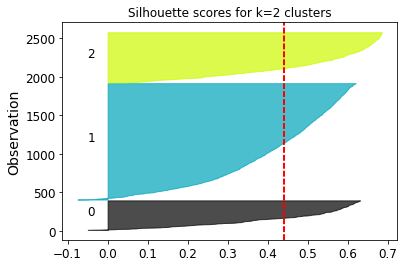

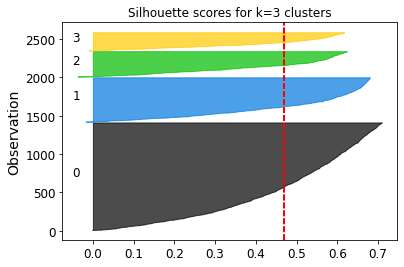

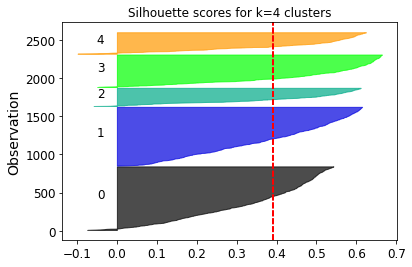

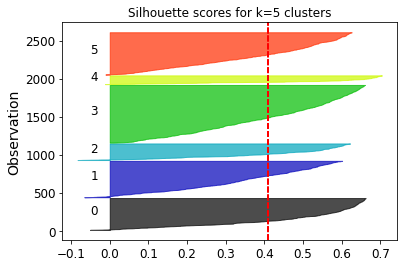

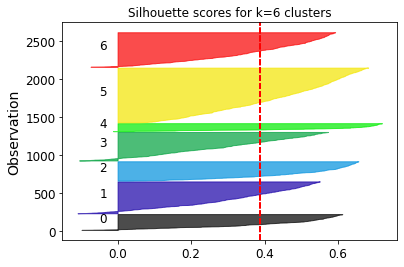

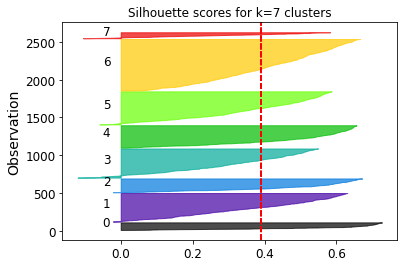

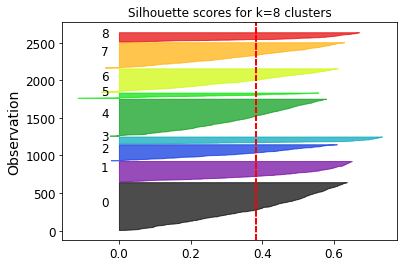

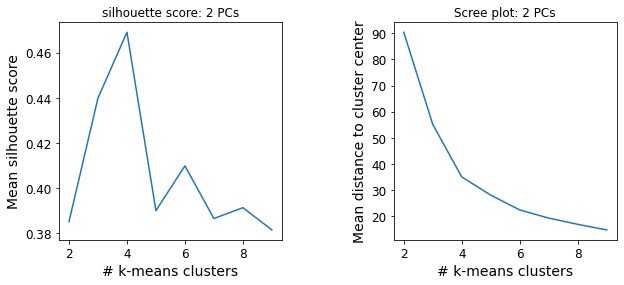

In [ ]:
pca_comps = 2
pca = PCA(n_components=pca_comps)
x_pca = pca.fit_transform(X_tfidf.toarray())
comps = np.arange(2,10,1)
score = []
silhouette_avg = []
# get kmeans score versus number of components
for n_clusters in comps:
    kmeans = KMeans(n_clusters=n_clusters).fit(x_pca)
    score.append(kmeans.score(x_pca))
    cluster_labels = kmeans.predict(x_pca)
    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)
    
    fig, ax1 = plt.subplots(1, 1)
    #ax0.plot(comps, score)
    #ax0.set_xlabel('# components')
    #ax0.set_title('k-means score')

    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.axvline(silhouette_avg[-1], linestyle='--', color='r')
        ax1.set_ylabel('Observation')
        ax1.set_title(f'Silhouette scores for k={i} clusters')
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
plt.subplots_adjust(hspace=1)
plt.show()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.plot(comps, silhouette_avg)
ax0.set_xlabel('# k-means clusters')
ax0.set_ylabel('Mean silhouette score')
ax0.set_title(f'silhouette score: {pca_comps} PCs')
ax1.plot(comps, -np.array(score))
ax1.set_xlabel('# k-means clusters')
ax1.set_ylabel('Mean distance to cluster center')
ax1.set_title(f'Scree plot: {pca_comps} PCs')
plt.subplots_adjust(wspace=0.5)
plt.show()

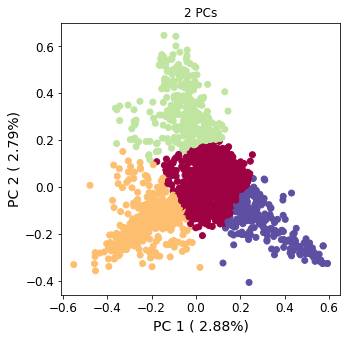

In [ ]:
k_clusts = 4
kmeans_pca = KMeans(n_clusters=k_clusts)

pca_comps = 2
pca = PCA(n_components=pca_comps)
x_pca = pca.fit_transform(X_tfidf.toarray())
kmeans_pca.fit(x_pca)

cmap = plt.cm.get_cmap(cmap_string, k_clusts)  

plot_pc_space(x_pca, pca, kmeans_pca.labels_, pca_comps, cmap)

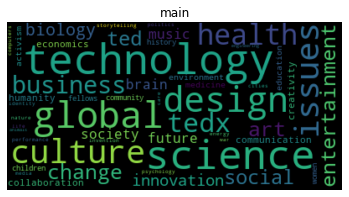

In [ ]:
text = ' '.join(df['tags_single_string'].str.lower().values)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", collocations=False).generate(text)
    
default_color = 'grey'   
# Display the generated image
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
ax.set_title(f'main')
plt.show()

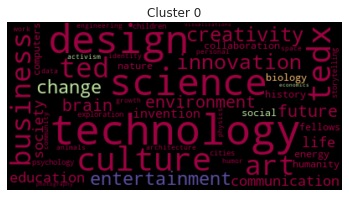

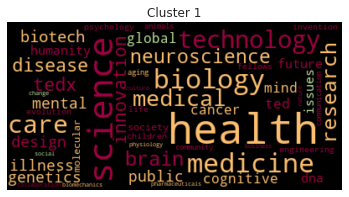

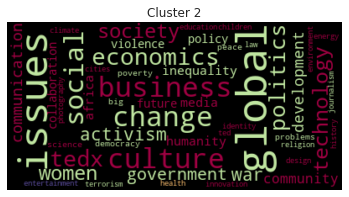

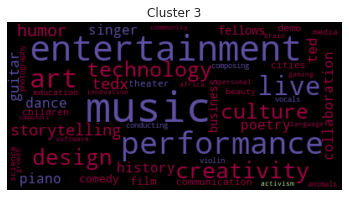

In [ ]:
wc, cl = assign_word_to_cluster(df.tags_single_string, kmeans_pca.labels_, countv.vocabulary_)
color_dict = assign_word_to_color(cl, cmap)

for i, clusters in enumerate(list(set(kmeans_pca.labels_))):
    cluster = np.where(kmeans_pca.labels_== clusters)
    text = ' '.join(df['tags_single_string'].str.lower().loc[cluster].values)
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", collocations=False).generate(text)
    
    default_color = 'grey'
    grouped_color_func = SimpleGroupedColorFunc(color_dict, default_color)
    #grouped_color_func = GroupedColorFunc(color_dict, default_color)
    wordcloud.recolor(color_func=grouped_color_func)
    
    # Display the generated image
    fig, ax = plt.subplots()
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Cluster {i}')
    plt.show()

# comparing with other online video dataset 

In [ ]:
usvideo = pd.read_csv('/content/USvideos.csv')
print(usvideo.columns)
print(usvideo.dtypes)
print(usvideo.shape)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object
(40949, 16)


views  comment_count     likes  dislikes
views          1.000000       0.617621  0.849177  0.472213
comment_count  0.617621       1.000000  0.803057  0.700184
likes          0.849177       0.803057  1.000000  0.447186
dislikes       0.472213       0.700184  0.447186  1.000000

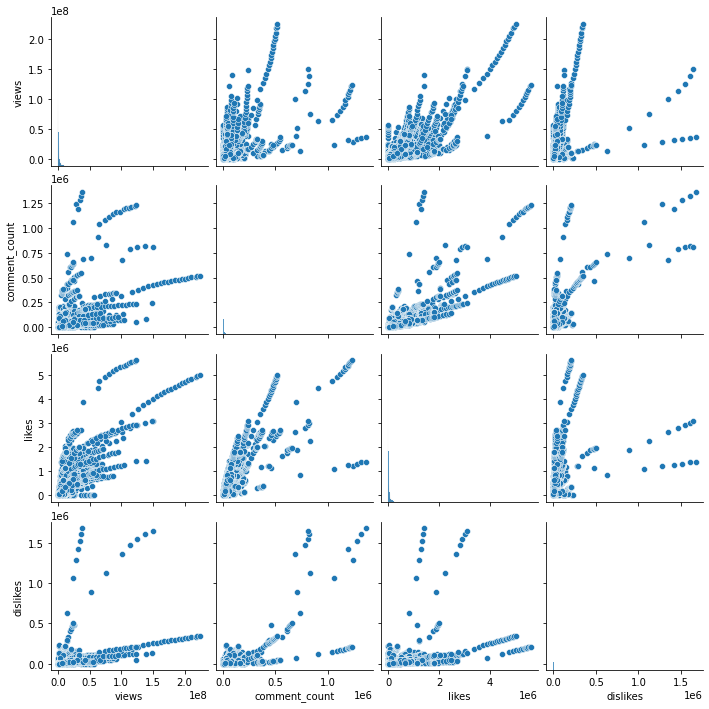

In [ ]:
sns.pairplot(data=usvideo, vars=["views", "comment_count", "likes","dislikes"])
display(usvideo[["views", "comment_count", "likes","dislikes"]].corr())

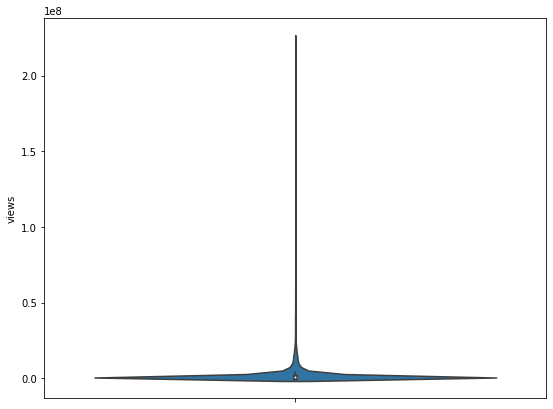

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = usvideo["views"] )

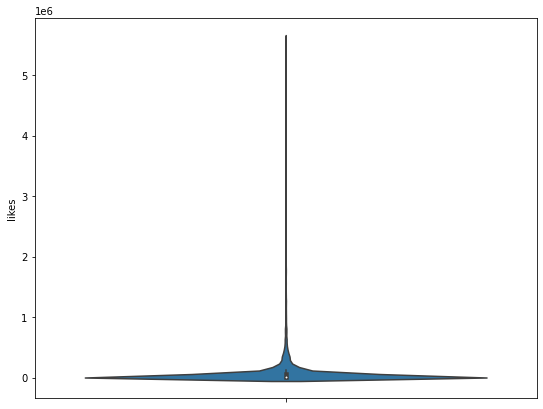

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = usvideo["likes"] )

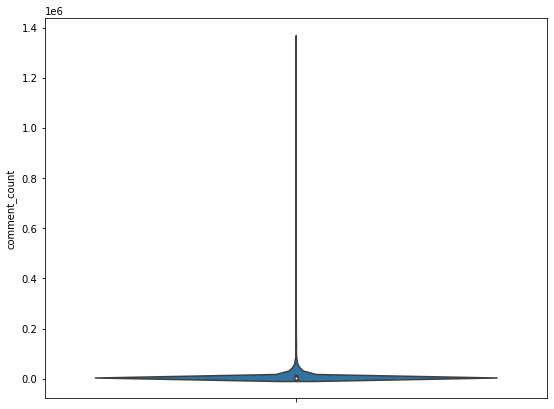

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = usvideo["comment_count"] )

In [ ]:
usvideo['dis_quo']=usvideo['likes']/usvideo['views']
#print(usvideo[['comment_count','views']])
#  'channel_title', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
usvideo[['title','views','likes', 'dislikes', 'comment_count','dis_quo']].sort_values('dis_quo',ascending=False).head(10)

title  ...   dis_quo
10200  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...  ...  0.290466
608            Luis Fonsi, Demi Lovato - Échame La Culpa  ...  0.270613
22174                               j-hope 'Airplane' MV  ...  0.265732
14428                         dodie - Secret For The Mad  ...  0.253659
5025         Louis Tomlinson - Miss You (Official Video)  ...  0.245111
38352  BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...  ...  0.244358
19780        5 Seconds Of Summer - Want You Back (Audio)  ...  0.242648
33789          Shawn Mendes: The Tour - Official Trailer  ...  0.240660
34000          Shawn Mendes: The Tour - Official Trailer  ...  0.230574
885                 Harry Styles - Kiwi (live in studio)  ...  0.228463

[10 rows x 6 columns]

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=usvideo['channel_title'], y = usvideo['views'], mode='lines+markers',name='views'))
fig.update_layout(title_text='Trend of views in publish_time',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
def stripper(x):
  for i in x:
    print(i)
    i.strip("\"")
  return x
usvideo["tags_dict"]=usvideo.tags.apply(lambda x: x.split("|"))
usvideo["tags_dict"]=usvideo.tags_dict.apply(lambda x: stripper(x)  )
usvideo["tags_dict"]


Streaming output truncated to the last 5000 lines.
streaming
"movies online"
movies online
"television online"
television online
"documentary"
documentary
"comedy"
comedy
"drama"
drama
"08282016NtflxUSCAN"
08282016NtflxUSCAN
"watch movies"
watch movies
"a christmas prince"
a christmas prince
"rom com"
rom com
"romance"
romance
"Christmas"
Christmas
"Christmas Day"
Christmas Day
"Christmas Eve"
Christmas Eve
"Rose McIver"
Rose McIver
"Ben Lamb"
Ben Lamb
"Alice Krige"
Alice Krige
thanksgiving
"mayim bialik"
mayim bialik
"bialik mayim"
bialik mayim
"the big bang theory"
the big bang theory
"big bang theory"
big bang theory
"holidays"
holidays
"bialik"
bialik
"mayim"
mayim
"turkey"
turkey
jacksfilms
"yiay"
yiay
"emojis"
emojis
"emoji"
emoji
"you"
you
blissing me
"björk"
björk
"Alternative"
Alternative
"Indie Pop"
Indie Pop
"utopia"
utopia
"one little indian records"
one little indian records
"bjork"
bjork
Columbia
"Harry Styles"
Harry Styles
"Kiwi"
Kiwi
"Pop"
Pop
lovelaurenelizabeth
"livel

KeyboardInterrupt: ignored

In [ ]:
print(usvideo.tags_dict)
#usvideo.tags_dict = usvideo.tags_dict.apply(ast.literal_eval)
print(usvideo.tags_dict)
usvideo['tags_single_string'] = usvideo.tags_dict.apply(' '.join)

0                                        [SHANtell martin]
1        [last week tonight trump presidency, "last wee...
2        [racist superman, "rudy", "mancuso", "king", "...
3        [rhett and link, "gmm", "good mythical morning...
4        [ryan, "higa", "higatv", "nigahiga", "i dare y...
                               ...                        
40944    [aarons animals, "aarons", "animals", "cat", "...
40945                                             [[none]]
40946    [I gave safiya nygaard a perfect hair makeover...
40947    [Black Panther, "HISHE", "Marvel", "Infinity W...
40948    [call of duty, "cod", "activision", "Black Ops...
Name: tags_dict, Length: 40949, dtype: object
0                                        [SHANtell martin]
1        [last week tonight trump presidency, "last wee...
2        [racist superman, "rudy", "mancuso", "king", "...
3        [rhett and link, "gmm", "good mythical morning...
4        [ryan, "higa", "higatv", "nigahiga", "i dare y...
          

In [ ]:
usvideo['tags_single_string']

0                                          SHANtell martin
1        last week tonight trump presidency "last week ...
2        racist superman "rudy" "mancuso" "king" "bach"...
3        rhett and link "gmm" "good mythical morning" "...
4        ryan "higa" "higatv" "nigahiga" "i dare you" "...
                               ...                        
40944    aarons animals "aarons" "animals" "cat" "cats"...
40945                                               [none]
40946    I gave safiya nygaard a perfect hair makeover ...
40947    Black Panther "HISHE" "Marvel" "Infinity War" ...
40948        call of duty "cod" "activision" "Black Ops 4"
Name: tags_single_string, Length: 40949, dtype: object